# Тема: прогнозы и предсказания

# Модели вероятности оттока и удержания клиентов фитнес клуба

## Описание проекта 

Сеть фитнес-центров разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных.  
Проблема: отток клиентов.  
Индикатор оттока: 0 посещений спортзала за последний месяц.  
Данные: анкеты пользователей в электронном виде.  
Задача: провести анализ и подготовить план действий по удержанию клиентов.  
Подзадачи:  
    1. Научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;  
    2. Сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;  
    3. Проанализировать основные признаки, наиболее сильно влияющие на отток;  
    4. Сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
        - выделить целевые группы клиентов;
        - предложить меры по снижению оттока;
        - определить другие особенности взаимодействия с клиентами.

## Данные

Путь к файлу: /datasets/gym_churn.csv   

Текущие поля в датасете:  
'Churn' — факт оттока в текущем месяце;

Данные пользователя за предыдущий до проверки факта оттока месяц:  
'gender' — пол  
'Near_Location' — проживание или работа в районе, где находится фитнес-центр  
'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)  
Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)  
'Phone' — наличие контактного телефона  
'Age' — возраст  
'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах)  

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:  
'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)  
'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах)  
'Group_visits' — факт посещения групповых занятий  
'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента  
'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц  
'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон  

## План

1. Загрузка и предобработка данных.    


2. Исследовательский анализ данных (EDA).
    - Посмотреть на датасет: есть ли в нем отсутствующие признаки, изучить средние значения и стандартные отклонения (пригодится метод describe());
    - Посмотреть на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (метод groupby());
    - Построить столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
    - Построить матрицу корреляций и отобразить её.


3. Построение модели прогнозирования оттока пользователей.  
    - Построить модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце:
        - Разбить данные на обучающую и валидационную выборку функцией train_test_split().
        - Обучить модель на train-выборке любыми двумя способами:
                *логистической регрессией
                *случайным лесом
        - Оценить метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравнить по ним модели. Какая модель показала себя лучше на основании метрик?
        - Указать параметр random_state при разделении выборки и задании алгоритма.  


4. Кластеризация пользователей.
    - Отложить в сторону столбец с оттоком и провести кластеризацию объектов (пользователей):
        - Стандартизировать данные.
        - Построить матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисовать дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположить, какое количество кластеров можно выделить.
        - Обучить модель кластеризации на основании алгоритма K-Means и спрогнозировать кластеры клиентов. За число кластеров принять n=5.
        - Посмотреть на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
        - Построить распределения признаков для кластеров. Можно ли что-то заметить по ним?
        - Для каждого полученного кластера посчитать долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?


5. Выводыи и рекомендации.
    - Сформулировать основные выводы и предложить рекомендации для стратегии взаимодействия с пользователями и их удержания.   
    (Не описывать стратегию детально: достаточно 3-4 важных принципов и примеров их реализации в виде определённых маркетинговых действий).
        

## Исследование

### 1. Загрузка и предобработка данных.

In [1]:
#Импорт библиотек
import pandas as pd
import math
from math import ceil
from math import factorial
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
import numpy as np
import seaborn as sns

In [ ]:
#Импорт библиотек
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
!pip install plotly

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [3]:
import plotly.express as px

In [4]:
#Загрузка файла
df=pd.read_csv('/datasets/gym_churn.csv')

In [5]:
#Обзор данных
df.tail(3)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0
3999,1,0,1,0,0,12,1,30,178.861814,12.0,1,1.101832,1.035270,0


In [6]:
#Обзор данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


4000 наблюдений, 14 числовых переменных. Явно пропущенных значений нет. 

In [7]:
#Преобразование названий столбцов к наиболее удобным
df.columns=df.columns.str.lower()
df=df.rename(columns={"avg_class_frequency_total": "visits_per_week", 
                      "avg_class_frequency_current_month": "visits_per_week_last_month", 
                      "avg_additional_charges_total": "additional_charges"})

df.tail(3)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,additional_charges,month_to_end_contract,lifetime,visits_per_week,visits_per_week_last_month,churn
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0
3999,1,0,1,0,0,12,1,30,178.861814,12.0,1,1.101832,1.035270,0


### 2. Исследовательский анализ данных (EDA).

#### Посмотреть на датасет: есть ли в нем отсутствующие признаки, изучить средние значения и стандартные отклонения.

In [8]:
#Описательная статистика
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,additional_charges,month_to_end_contract,lifetime,visits_per_week,visits_per_week_last_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


- gender: равномерное распределение между 0 и 1 - 49% и 51%.  
- near_location: 85% опрошенных проживают или работают в районе, где находится фитнес-центр.  
- partner: 49% опрошенных - сотрудники компаний-партнеров клуба.  
- promo_friends: 31% первоначально записались в рамках акции "приведи друга".  
- phone: 90% указали свой контактный телефон.  
- **contract_period**: средняя длительность контракта 5 месяцев, медиана на уровне 1 месяца, минимум 1, максимум 12. Значит выбросов с некорректными значениями нет, но стоит посмотреть на распределение. Большинство людей заключают короткие месячные контракты.   
- group_visits: 41% посещают групповые занятия.  
- age: средний возраст 29 лет, станд.отклонение 3.26, медиана на уровне 29 лет. Минимальный возраст 18, максимальный 41. Значит  выбросов нет.  
- **additional_charges**: среднее значение 147, медиана 136, станд.отклонение 96. Минимум 0, максимум 552 - значения корректные. Но стоит посмотреть на распределение.  
- **month_to_end_contract**: среднее значение 4, медиана 1, станд.отклонение 4. Минимум 1, максимум 12. Значения корректны. Логично, что большинству людей осталось до конца контракта 1 месяц, так как впринципе большинство контрактов короткие. Посмотрим на распределение.     
- **lifetime**: среднее время с момента первого обращения в клуб 4 месяца, медиана 3 месяца, станд.отклонение 4 месяца. Минимум 0, максимум 31. посмотрим на распределение.  
- **visits_per_week**: в среднем 2 посещения в неделю, медиана тоже на уровне 2, станд.отклонение 0.97. Минимум 0, максимум 6. Посмотрим на распределение.  
- **visits_per_week_last_month**: не сильно отличается от переменной visits_per_week.  
- churn: только 27% ушли в текущем месяце. Значит целевая переменная будет несбалансированной. 

#### contract_period

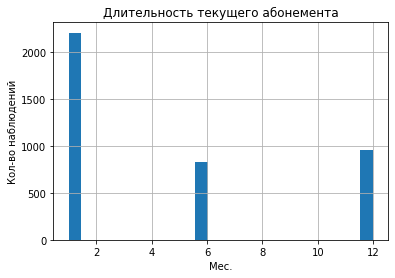

In [9]:
#Гистограмма для столбца 'contract_period'
df['contract_period'].hist(bins=24)
plt.title('Длительность текущего абонемента')
plt.xlabel('Мес.')
plt.ylabel('Кол-во наблюдений')
plt.show()

In [10]:
#Обзор значений столбца 'contract_period'
df['contract_period'].value_counts()

1     2207
12     960
6      833
Name: contract_period, dtype: int64

Есть контракты длительностью 1, 6 и 12 месяцев. Распределение не равномерное, но кол-во наблюдений в каждой группе достаточное.

#### month_to_end_contract

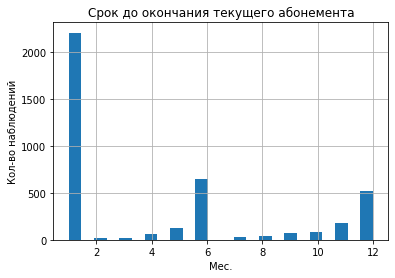

In [11]:
#Гистограмма для столбца 'month_to_end_contract'
df['month_to_end_contract'].hist(bins=24)
plt.title('Срок до окончания текущего абонемента')
plt.xlabel('Мес.')
plt.ylabel('Кол-во наблюдений')
plt.show()

Похоже на то, что большая часть опрошенных только заключили свои контракты.

#### additional_charges

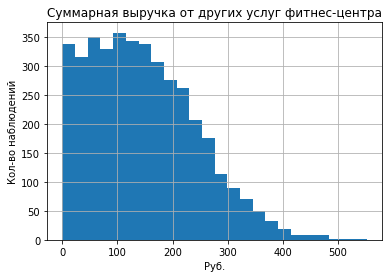

In [12]:
#Гистограмма для столбца 'additional_charges'
df['additional_charges'].hist(bins=24)
plt.title('Cуммарная выручка от других услуг фитнес-центра')
plt.xlabel('Руб.')
plt.ylabel('Кол-во наблюдений')
plt.show()

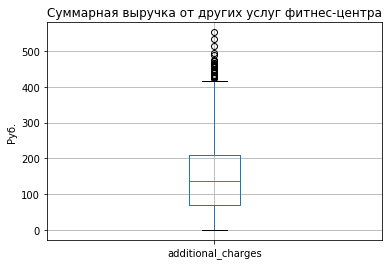

In [13]:
#Гистограмма для столбца 'additional_charges'
df.boxplot('additional_charges')
plt.title('Cуммарная выручка от других услуг фитнес-центра')
plt.xlabel('')
plt.ylabel('Руб.')
plt.show()

In [14]:
print('99-ый персентиль: ', np.percentile(df['additional_charges'], 99))

99-ый персентиль:  400.9961250467456


#### lifetime

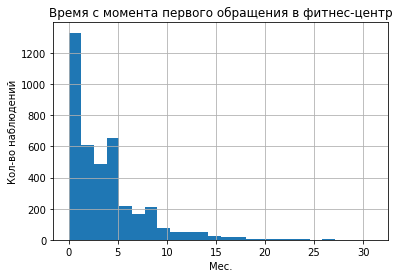

In [15]:
#Гистограмма для столбца lifetime
df['lifetime'].hist(bins=24)
plt.title('Время с момента первого обращения в фитнес-центр')
plt.xlabel('Мес.')
plt.ylabel('Кол-во наблюдений')
plt.show()


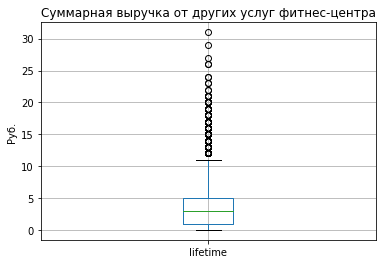

In [16]:
#Гистограмма для столбца 'lifetime'
df.boxplot('lifetime')
plt.title('Cуммарная выручка от других услуг фитнес-центра')
plt.xlabel('')
plt.ylabel('Руб.')
plt.show()

In [17]:
print('99-ый персентиль: ', np.percentile(df['lifetime'], 99))

99-ый персентиль:  17.0


#### visits_per_week

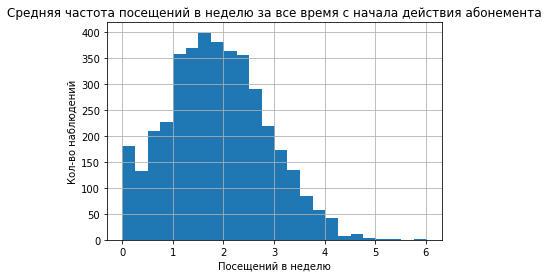

In [18]:
#Гистограмма для столбца 'visits_per_week'
df['visits_per_week'].hist(bins=24)
plt.title('Средняя частота посещений в неделю за все время с начала действия абонемента')
plt.xlabel('Посещений в неделю')
plt.ylabel('Кол-во наблюдений')
plt.show()



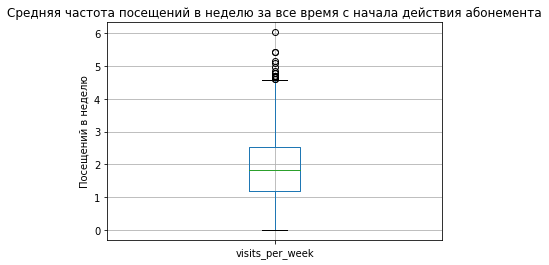

In [19]:
#Гистограмма для столбца 'visits_per_week'
df.boxplot('visits_per_week')
plt.title('Средняя частота посещений в неделю за все время с начала действия абонемента')
plt.xlabel('')
plt.ylabel('Посещений в неделю')
plt.show()

In [20]:
print('99-ый персентиль: ', np.percentile(df['visits_per_week'], 99))

99-ый персентиль:  4.197579250683466


#### visits_per_week_last_month

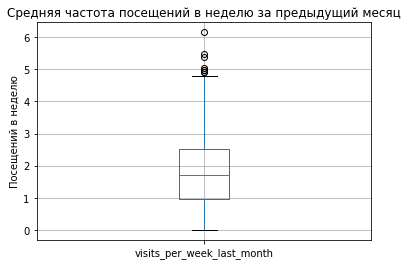

In [21]:
#Гистограмма для столбца 'visits_per_week'
df.boxplot('visits_per_week_last_month')
plt.title('Средняя частота посещений в неделю за предыдущий месяц')
plt.xlabel('')
plt.ylabel('Посещений в неделю')
plt.show()

In [22]:
print('99-ый персентиль: ', np.percentile(df['visits_per_week_last_month'], 99))

99-ый персентиль:  4.185757787657458


#### Удаление выбросов

In [23]:
df=df[(df['additional_charges']<400.9961)&(df['lifetime']<17)&(df['visits_per_week']<4.1976)&(df['visits_per_week_last_month']<4.1858)]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3870 entries, 0 to 3999
Data columns (total 14 columns):
gender                        3870 non-null int64
near_location                 3870 non-null int64
partner                       3870 non-null int64
promo_friends                 3870 non-null int64
phone                         3870 non-null int64
contract_period               3870 non-null int64
group_visits                  3870 non-null int64
age                           3870 non-null int64
additional_charges            3870 non-null float64
month_to_end_contract         3870 non-null float64
lifetime                      3870 non-null int64
visits_per_week               3870 non-null float64
visits_per_week_last_month    3870 non-null float64
churn                         3870 non-null int64
dtypes: float64(4), int64(10)
memory usage: 453.5 KB


#### Посмотреть на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.

In [25]:
df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,additional_charges,month_to_end_contract,lifetime,visits_per_week,visits_per_week_last_month
churn,,,,,,,,,,,,,
0,0.511744,0.873310,0.537367,0.356584,0.902491,5.760142,0.457651,29.982206,154.395139,5.298577,4.466904,1.989989,1.992277
1,0.510377,0.767925,0.355660,0.183962,0.902830,1.729245,0.268868,26.986792,114.790019,1.663208,0.986792,1.475433,1.045386


Судя по средним значениям, попавшие в отток клиенты:
- реже живут или работают рядом с фитнес-клубом
- реже являются сотрудниками компаний-партнеров
- реже записываются в клуб в рамках акции «приведи друга»
- заключают контракт в среднем на более короткий срок
- реже посещают групповые занятия
- в среднем моложе на 3 года
- в среднем вносят меньше денег за доп.услуги
- в среднем у них остается меньше времени до окончания абонемента
- это более "свежие клиенты" (прошло меньше времени с момента первого обращения в фитнес-центр)
- в среднем у них меньше посещений в неделю как за все время, так и за последний месяц.


#### Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).

In [26]:
# определим функцию отрисовки графиков распределения значений признаков для двух групп
def show_clusters_on_plot(column):
    plt.figure(figsize = (10,5))
    sns.distplot(df[df['churn']==0][column], hist=False, label='0')
    sns.distplot(df[df['churn']==1][column], hist=False, label='1')
    
    x_min=df[column].min()
    if x_min==0:
        x_min=-0.5
        
    x_max=df[column].max()*1.5
    plt.title(i)
    plt.xlabel('')
    plt.xlim(x_min, x_max)
    plt.grid(axis='x')
    plt.show()

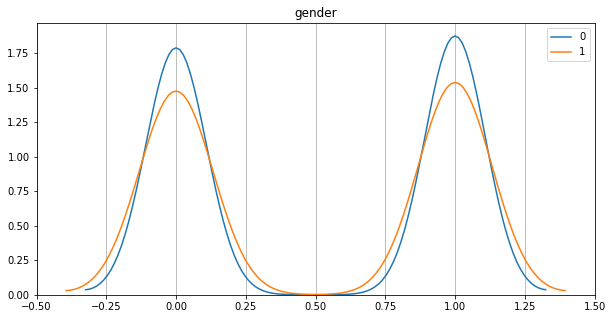

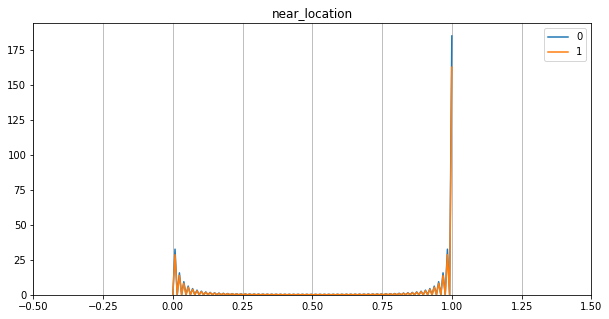

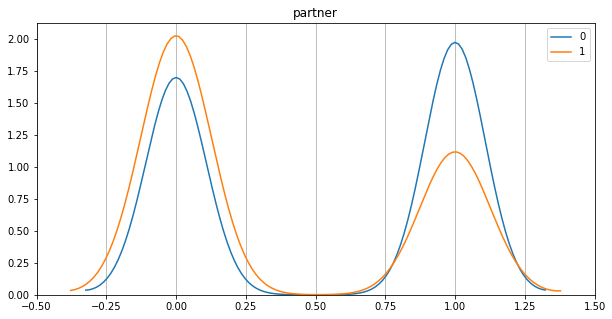

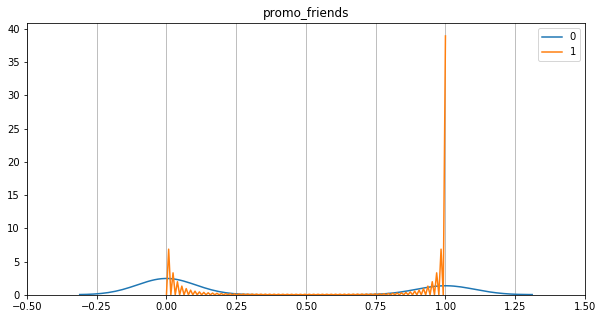

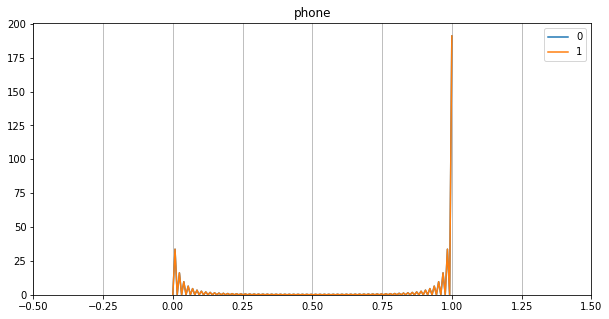

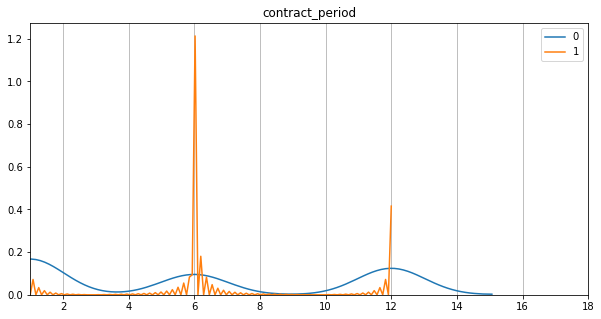

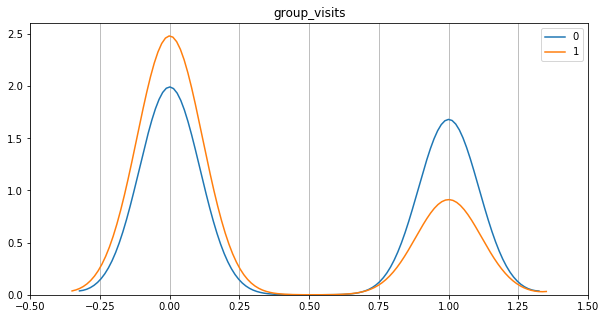

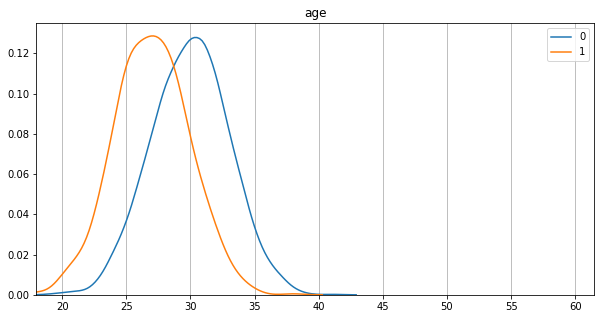

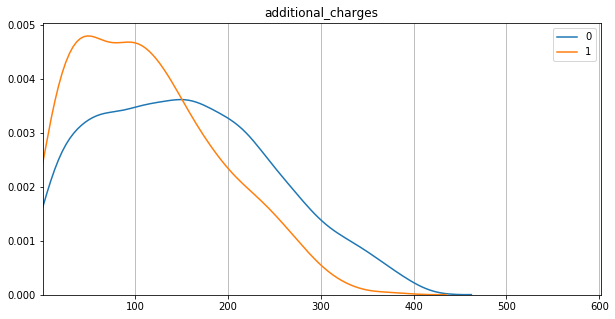

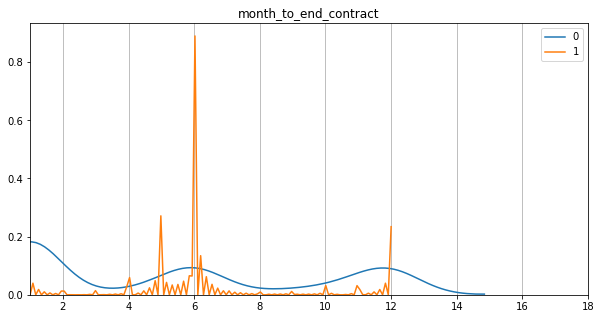

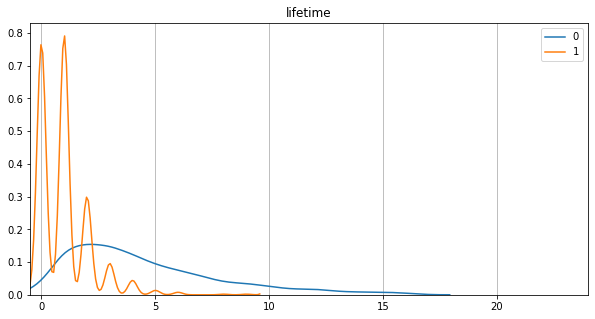

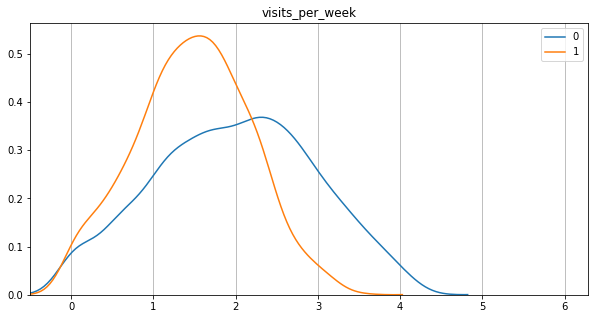

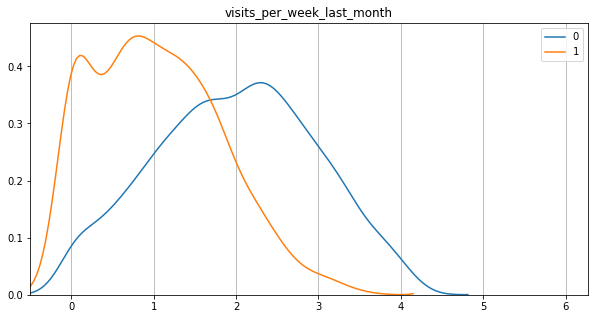

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



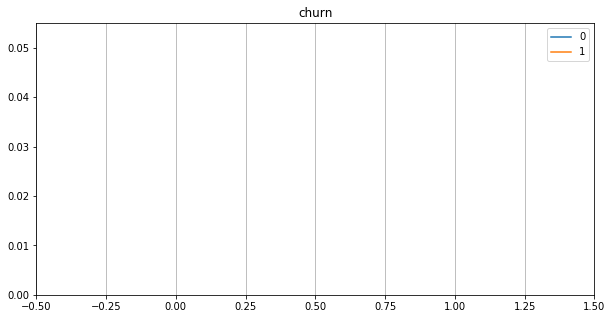

In [27]:
#Отрисуем для каждого столбца
for i in df.columns:
    show_clusters_on_plot(i)

По графикам распределения видно, что попавшие в отток клиенты:   
реже бывают сотрудниками компаний-партнеров;   
реже посещают групповые занятия;   
моложе;      
меньше тратят на доп.услуги;   
более "свежие" клиенты;   
реже посещают зал.





#### Постройте матрицу корреляций и отобразите её.

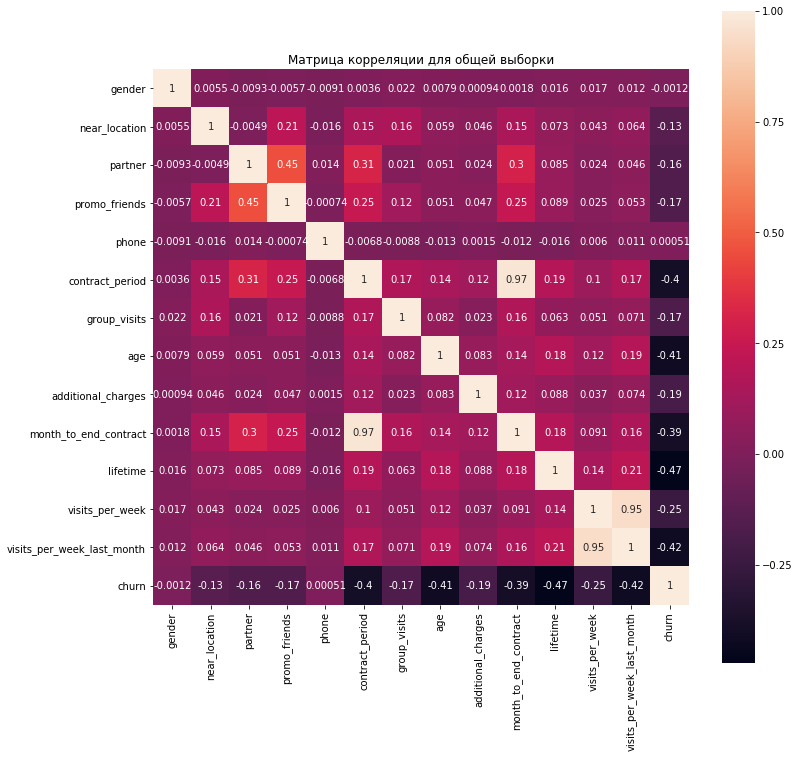

In [28]:
#Матрица корреляций
cm = df.corr()
#sns.set(style='white')
plt.figure(figsize=(12, 12))
plt.title('Матрица корреляции для общей выборки')
sns.heatmap(cm, annot = True, square=True)
plt.show()



## 3. Построение модели прогнозирования оттока пользователей.

#### Построить модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце.
#### Разбить данные на обучающую и валидационную выборку функцией train_test_split().

In [30]:
#Разделение выбоки на целевое значение и признаки
X = df.drop('churn', axis=1)
y = df.churn

In [31]:
#Разделение на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [32]:

# стандартизируем данные 
scaler = StandardScaler()
# обучите scaler на обучающей выборке методом fit
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
# стандартизируйте обучающую выборку методом transform scaler 
X_test_st = scaler.transform(X_test)
# стандартизируйте тестовую выборку методом transform scaler

#### Обучите модель на train-выборке любыми двумя способами:
- логистической регрессией
- случайным лесом

In [33]:
#Функция для вывода метрик
def print_all_metrics(y_true, y_pred, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))


In [34]:
#логистической регрессией
model_log = LogisticRegression(random_state = 0)
#обучаем модель
model_log.fit(X_train_st, y_train)
#делаем прогноз
y_pred_log = model_log.predict(X_test_st)
#Вывод метрик
print_all_metrics(y_test, y_pred_log, title='Метрики для модели логистической регрессии:')

Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.83


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



В модели случайного леса посмотрим метрики точности перебором для разных значений n_estimators: 10, 20, 50, 100, 250, 500.

In [35]:
#случайным лесом (n_estimators=10)
model_rf = RandomForestClassifier(n_estimators = 10, random_state = 0)
#обучаем модель
model_rf.fit(X_train_st, y_train)
#делаем прогноз
y_pred_rf = model_rf.predict(X_test_st)
#Вывод метрик
print_all_metrics(y_test, y_pred_rf, title = 'Метрики для модели случайного леса (10 деревьев):')

Метрики для модели случайного леса (10 деревьев):
	Accuracy: 0.91
	Precision: 0.90
	Recall: 0.74


In [36]:
#случайным лесом (n_estimators=20)
model_rf = RandomForestClassifier(n_estimators = 20, random_state = 0)
#обучаем модель
model_rf.fit(X_train_st, y_train)
#делаем прогноз
y_pred_rf = model_rf.predict(X_test_st)
#Вывод метрик
print_all_metrics(y_test, y_pred_rf, title = 'Метрики для модели случайного леса (20 деревьев):')

Метрики для модели случайного леса (20 деревьев):
	Accuracy: 0.91
	Precision: 0.87
	Recall: 0.77


In [37]:
#случайным лесом (n_estimators=50)
model_rf = RandomForestClassifier(n_estimators = 50, random_state = 0)
#обучаем модель
model_rf.fit(X_train_st, y_train)
#делаем прогноз
y_pred_rf = model_rf.predict(X_test_st)
#Вывод метрик
print_all_metrics(y_test, y_pred_rf, title = 'Метрики для модели случайного леса (50 деревьев):')

Метрики для модели случайного леса (50 деревьев):
	Accuracy: 0.91
	Precision: 0.88
	Recall: 0.80


In [38]:
#случайным лесом (n_estimators=100)
model_rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
#обучаем модель
model_rf.fit(X_train_st, y_train)
#делаем прогноз
y_pred_rf = model_rf.predict(X_test_st)
#Вывод метрик
print_all_metrics(y_test, y_pred_rf, title = 'Метрики для модели случайного леса (100 деревьев):')

Метрики для модели случайного леса (100 деревьев):
	Accuracy: 0.91
	Precision: 0.89
	Recall: 0.79


In [39]:
#случайным лесом(n_estimators=250)
model_rf = RandomForestClassifier(n_estimators = 250, random_state = 0)
#обучаем модель
model_rf.fit(X_train_st, y_train)
#делаем прогноз
y_pred_rf = model_rf.predict(X_test_st)
#Вывод метрик
print_all_metrics(y_test, y_pred_rf, title = 'Метрики для модели случайного леса (250 деревьев):')

Метрики для модели случайного леса (250 деревьев):
	Accuracy: 0.92
	Precision: 0.89
	Recall: 0.79


In [40]:
#случайным лесом (n_estimators=500)
model_rf = RandomForestClassifier(n_estimators = 500, random_state = 0)
#обучаем модель
model_rf.fit(X_train_st, y_train)
#делаем прогноз
y_pred_rf = model_rf.predict(X_test_st)
#Вывод метрик
print_all_metrics(y_test, y_pred_rf, title = 'Метрики для модели случайного леса (500 деревьев):')

Метрики для модели случайного леса (500 деревьев):
	Accuracy: 0.92
	Precision: 0.89
	Recall: 0.80


#### Сравнение двух моделей

### 4. Кластеризация пользователей.

In [41]:
#Импорт библиотек
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

#### Стандартизировать  данные


In [42]:
# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(X)

#### Построить матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисовать дендрограмму

In [43]:
#Построить матрицу расстояний
linked = linkage(X_sc, method = 'ward')

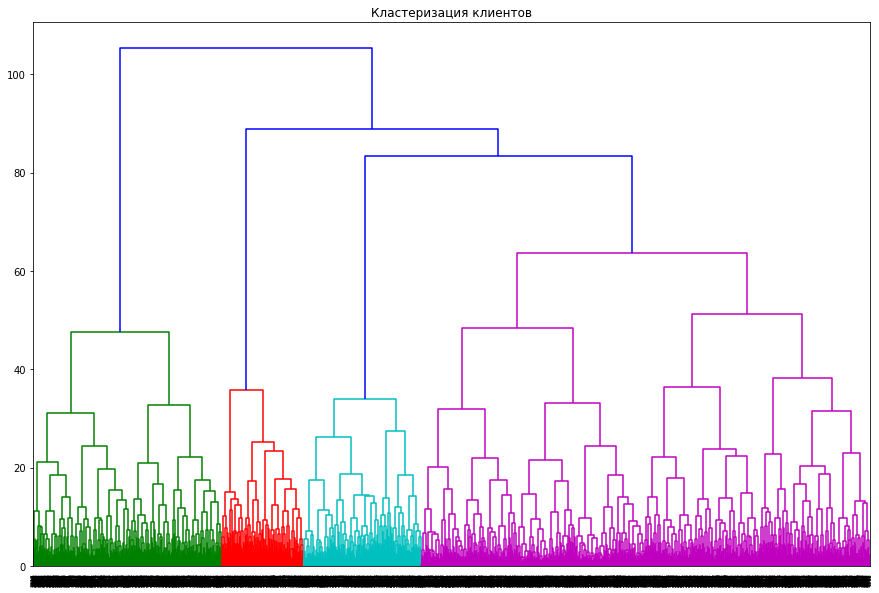

In [44]:
#Отрисовка дендрограммы
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация клиентов')
plt.show()

Предложенное оптимальное число кластеров 4.

#### Обучить модель кластеризации на основании алгоритма K-Means и спрогнозировать кластеры клиентов

In [45]:
# задаём число кластеров, равное 5
km = KMeans(n_clusters = 5, random_state = 0) 
# применяем алгоритм к данным и формируем вектор кластеров
labels = km.fit_predict(X_sc) 

#### Посмотреть на средние значения признаков для кластеров

In [46]:
#Создаем столбец с номером кластера
df['claster']=labels

In [47]:
# выводим статистику по средним значениям наших признаков по кластеру
df.groupby('claster').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,additional_charges,month_to_end_contract,lifetime,visits_per_week,visits_per_week_last_month,churn
claster,,,,,,,,,,,,,,
0,0.492509,1.000000,0.237828,0.026217,0.905431,1.970974,0.321161,28.191011,129.343866,1.889513,2.217228,1.252746,1.001378,0.544007
1,0.582550,0.969128,0.249664,0.084564,0.897987,2.702013,0.464430,30.135570,154.596844,2.491275,4.928859,2.774786,2.769237,0.077852
2,0.483766,1.000000,0.836039,1.000000,0.897727,3.131494,0.451299,29.147727,140.366243,2.900974,3.402597,1.734367,1.629314,0.251623
3,0.501639,0.942077,0.744262,0.489617,0.899454,11.829508,0.542077,29.933333,161.385933,10.832787,4.492896,1.990397,1.981441,0.022951
4,0.498099,0.000000,0.477186,0.079848,0.914449,2.182510,0.205323,28.427757,129.429901,2.051331,2.568441,1.637062,1.439500,0.465779


gender: сложно сказать.   
near_location: кластер 0 и 2 - все живут или работают рядом с клубом, кластер 4 - наоборот, никто.   
partner: кластер 2 и 3 - клиенты являются сотрудниками компаний-партнеров почти в два раза чаще, чем в других кластерах.   
promo_friends: кластер 2 - все пришли по акции.    
phone: кластер 0 - сложно сказать.  
contract_period: кластер 3 - самая большая длительность абонемента (часто - год).   
group_visits: сложно сказать.   
age: сложно сказать.   
additional_charges: сложно сказать.    
month_to_end_contract: кластер 3 - больше всего времени осталось до окончания абонемента (в среднем 10 месяцев).    
lifetime: сложно сказать.     
visits_per_week и visits_per_week_last_month: сложно сказать.

#### Построить распределения признаков для кластеров

In [48]:
# определим функцию отрисовки графиков распределения значений признаков для кластеров
def show_clusters_on_plot(column):
    plt.figure(figsize = (10,5))
    sns.distplot(df[df['claster']==0][column], hist=False, label='0')
    sns.distplot(df[df['claster']==1][column], hist=False, label='1')
    sns.distplot(df[df['claster']==2][column], hist=False, label='2')
    sns.distplot(df[df['claster']==3][column], hist=False, label='3')
    sns.distplot(df[df['claster']==4][column], hist=False, label='4')

    
    x_min=df[column].min()
    if x_min==0:
        x_min=-0.5
        
    x_max=df[column].max()*1.5
    plt.title(i)
    plt.xlabel('')
    plt.xlim(x_min, x_max)
    plt.grid(axis='x')
    plt.show()

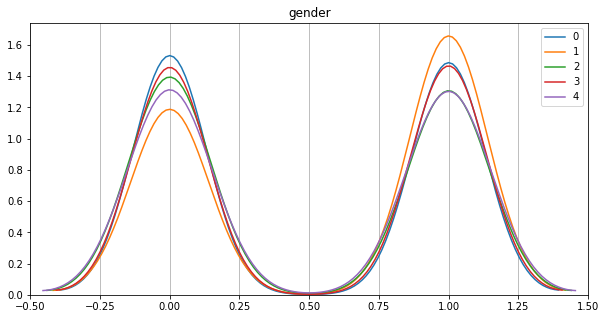

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



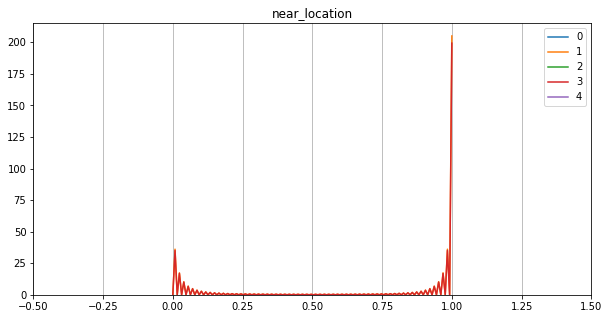

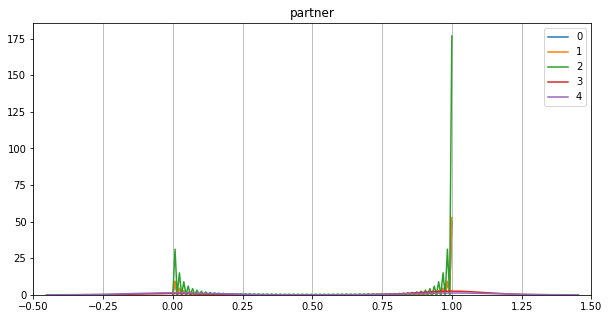

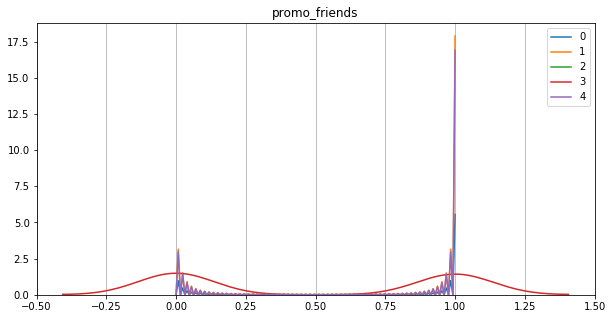

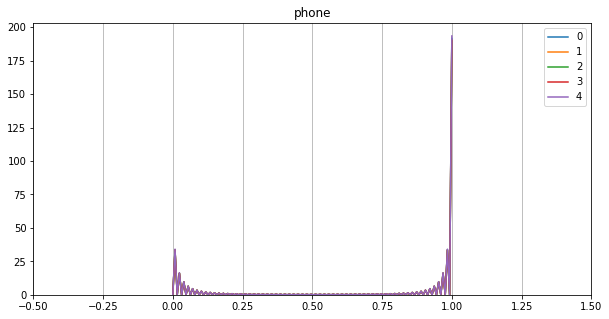

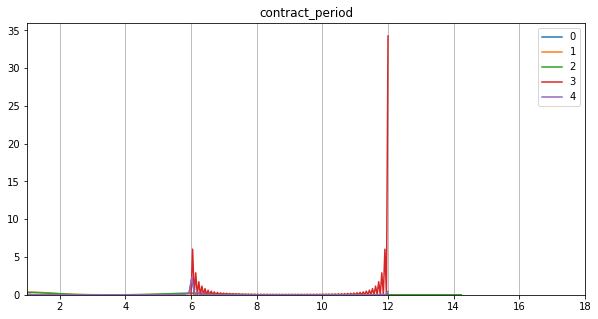

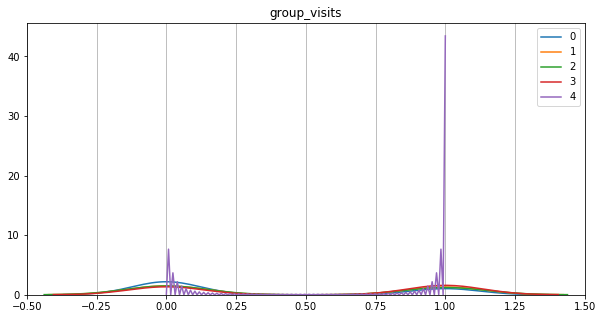

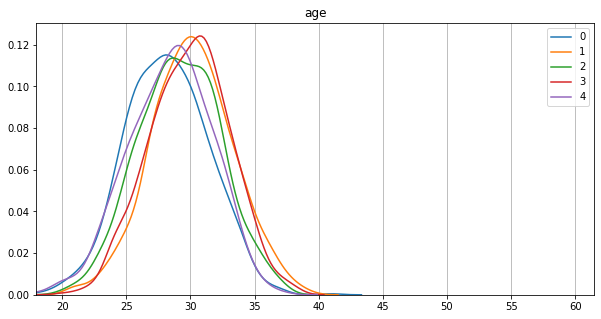

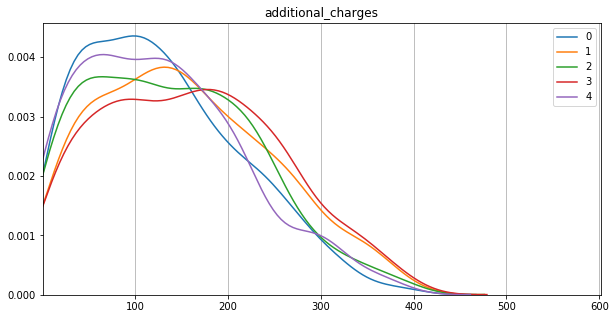

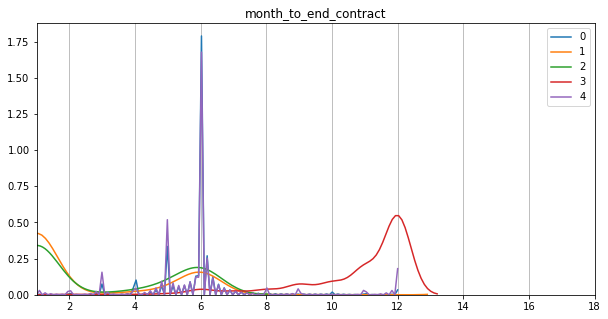

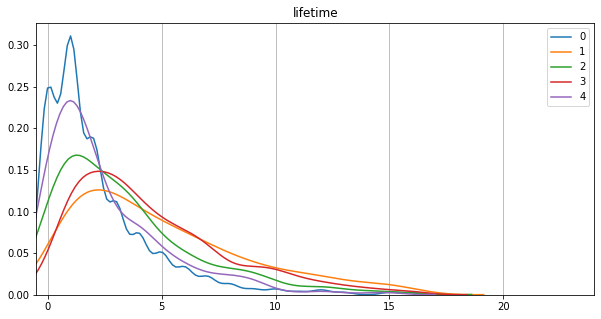

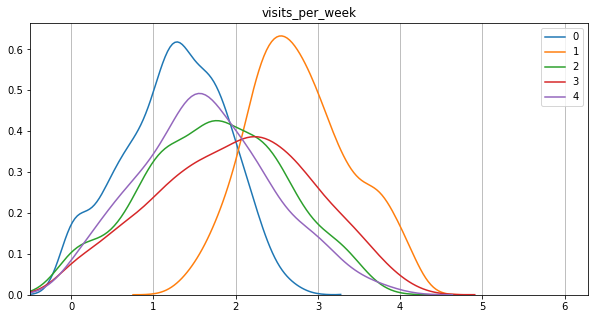

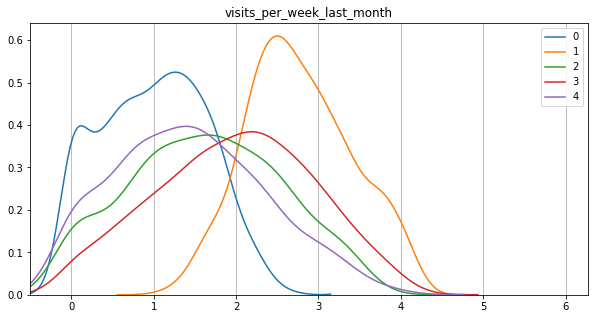

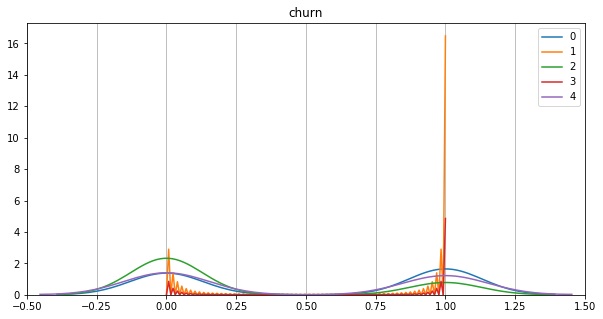

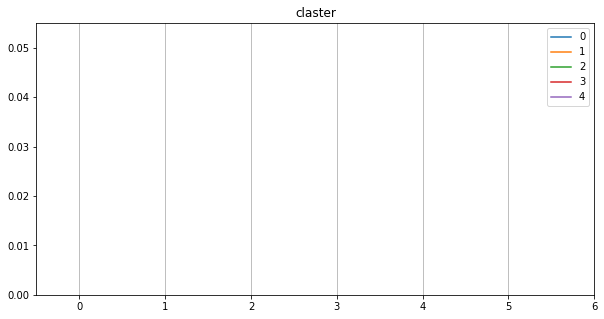

In [49]:
#Отрисуем для каждого столбца
for i in df.columns:
    show_clusters_on_plot(i)

#### Для каждого полученного кластера посчитайте долю оттока

In [50]:
df.groupby('claster')['churn'].mean()

claster
0    0.544007
1    0.077852
2    0.251623
3    0.022951
4    0.465779
Name: churn, dtype: float64

Кластеры отличаются по доле оттока клиентов.    
В кластере 3 самая низкая доля оттока (менее 3%), в кластере 0 - самая высокая (более 50%).

Итак, признаки, характерные для кластеров 0 и 4 (с максимальной долей оттока):
    - контракты длительностью 1 месяц;
    - непосещение групповых занятий;
    - более молодой возраст;
    - низкие расходы на доп.услуги;
    - более "свежие" клиенты (с момента первого обращения прошло немного времени);
    - малое количество посещений в неделю, особенно в последний месяц.
    


### 5. Выводы и рекомендации 


1. На основе 4000 наблюдений была сформирована репрезентативная выборка из 3870 событий. 
    
2. Для дальнейшего анализа переменная "факт оттока" была выбрана как контрольная. Были проанализированы средние значения признаков для двух групп: кто ушел и кто остался. Результаты показали, что попавшие в отток клиенты:    
    - реже живут или работают рядом с фитнес-клубом
    - реже являются сотрудниками компаний-партнеров
    - реже записываются в клуб в рамках акции «приведи друга»
    - заключают контракт в среднем на более короткий срок
    - реже посещают групповые занятия
    - в среднем моложе на 3 года
    - в среднем вносят меньше денег за доп.услуги
    - в среднем у них остается меньше времени до окончания абонемента
    - это более "свежие клиенты" (прошло меньше времени с момента первого обращения в фитнес-центр)
    - в среднем у них меньше посещений в неделю как за все время, так и за последний месяц.  
       
3. Были построены графики для визуального сравнения значений в двух группах. По графикам распределения видно, что попавшие в отток клиенты:   
    - реже бывают сотрудниками компаний-партнеров;
    - реже посещают групповые занятия;
    - моложе;
    - меньше тратят на доп.услуги;
    - более "свежие" клиенты;
    - реже посещают зал.   
    
4. Матрица корреляции показала, что среди пар переменных contract_period и month_to_end_contract, visits_per_week и visits_per_week_last_month корреляция выше 90%. 

5. Были построены две модели прогнозирования оттока пользователей: логистическая регрессия и случайный лес. После оценки метрик точности, модель логистической регрессии была выбрана как наиболее точная. Значения метрик для модели логистической регрессии:
	- Accuracy: 0.92
	- Precision: 0.88
	- Recall: 0.83

6. Была построена дендрограмма и выполнена кластеризация пользователей на основании алгоритма K-Means. В итоге было принято 5 кластеров. выведены средние значения признаков для каждого кластера. Кластеры отличаются по доле оттока клиентов.

    Кластер 0 - доля оттока 54%   
    Кластер 4 - доля оттока 47% 
    Кластер 2 - доля оттока 25%     
    Кластер 1 - доля оттока 8%   
    Кластер 3 - доля оттока 2%   
    
Итак, признаки, характерные для кластеров с максимальной долей оттока:

- контракты длительностью 1 месяц;
- непосещение групповых занятий;
- более молодой возраст;
- низкие расходы на доп.услуги;
- более "свежие" клиенты (с момента первого обращения прошло немного времени);
- малое количество посещений в неделю, особенно в последний месяц.

Такие показатели свидетельствуют о слабой степени вовлеченности клиентов (редкие посещения) и низком уровне доверия и привязанности (короткие контракты).

Таким образом, можно рекомендовать предпринять меры по повышению вовлеченности таких клиентов.
- Новостные рассылки
- Приглашения на групповые занятия
- Реклама доп.услуг
- Личный контакт с клиентом и получение обратной связи и отзывов

А так же меры по повышению уровня доверия и привязанности клиента:
- Выгодные условия на более длительные абонементы
- Напоминания и предложения для покупки новых абонементов, если у текущих скоро истекает срок действия
- Скидки, мотивирующие купить абонемент до окончания срока предыдущего (на будущее)
- Индивидуальный подход к клиентам с особенно высоким уровнем вероятности оттока. Личные беседы, звонки, рассылки, индивидуальный подбор условий.
